In [1]:
import networkx as nx
import syft as sy
import numpy as np

from syft.service.action.action_graph import Action, ActionGraph, ActionGraphNode, InMemoryGraphClient, UID
from syft.service.action.numpy import NumpyArrayObject, ActionObject

print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.0-beta.8


In [2]:
worker = sy.Worker()
admin_client = worker.root_client

> Worker: Angry He - 28ffe14790ce43c6a44af64ea89fac7b - NodeType.DOMAIN

Services:
ActionService
DataSubjectMemberService
DataSubjectService
DatasetService
MessageService
MetadataService
NetworkService
PolicyService
ProjectService
RequestService
UserCodeService
UserService


In [3]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])

Save the action objects to the action store

In [4]:
admin_client.api.services.action.set(action_obj_a)
admin_client.api.services.action.set(action_obj_b)

[2, 3, 4]

In [5]:
print(worker.action_store)
worker.action_store.data

,key,type,id
0,ba5ef39a8a9b4e6899a26e2778c986ee,"[1, 2, 3]",ba5ef39a8a9b4e6899a26e2778c986ee
1,2bb966dfdded4fd193fbe7b6cf37b469,"[2, 3, 4]",2bb966dfdded4fd193fbe7b6cf37b469


Make the actions

In [6]:
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)

action1

```python
class Action:
  id: str = 2800c9cf06de4861b1281947ad91489c
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: ba5ef39a8a9b4e6899a26e2778c986ee - 908050351471721057>]
  kwargs: str = {}
  result_id: str = 8a3d6761c89d40d7a78418ec4e9eaf1f

```

In [7]:
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)

action2

```python
class Action:
  id: str = 069f1440821642e190ca7cb33efabedf
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 2bb966dfdded4fd193fbe7b6cf37b469 - 1281026384946410240>]
  kwargs: str = {}
  result_id: str = 956197abbc074196a2e02168af975990

```

Create the action graph

In [8]:
graph = ActionGraph(node_uid=worker.id, graph_client=InMemoryGraphClient)
graph

Add the actions

In [9]:
graph.add_action(action1)
graph.add_action(action2)

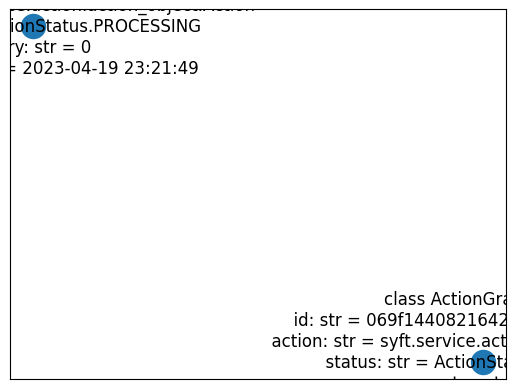

In [10]:
graph.draw_graph()

In [11]:
graph.client.nodes

NodeView((class ActionGraphNode:
  id: str = 2800c9cf06de4861b1281947ad91489c
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-19 23:21:49
, class ActionGraphNode:
  id: str = 069f1440821642e190ca7cb33efabedf
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-19 23:21:49
))

Create a third action that depends on the previous 2 actions

do something like `array_1.__add__(array_2)`

In [12]:
action_res = Action(
    path="action.execute",
    op="__add__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)

`result_id` is the ID where we store the result of an `Action` in a database 

In [13]:
action1.result_id

<LineageID: 8a3d6761c89d40d7a78418ec4e9eaf1f - 1832775909045220862>

In [14]:
action_res.result_id

<LineageID: d06d0b76673046dbafdeca18ce1fef97 - 1389120568298710696>

In [15]:
graph.add_action(action_res)

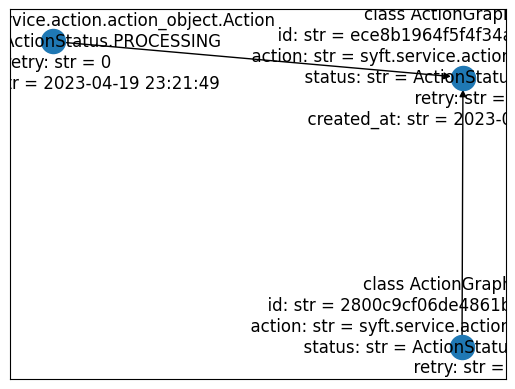

In [16]:
graph.draw_graph()

In [17]:
graph.is_parent(parent=action2, child=action_res)

True

In [18]:
graph.is_parent(parent=action1, child=action_res)

True

In [19]:
graph.is_parent(parent=action2, child=action1)

False

Saving the action

In [21]:
!ls

'Action Graph.ipynb'   G.bytes	 G.gexf   None


In [22]:
graph.save()

/tmp/action_graph.bytes


In [25]:
graph2 = ActionGraph(node_uid=worker.id, graph_client=InMemoryGraphClient)

graph2.load()

/tmp/action_graph.bytes


In [24]:
list(graph.nodes())

,type,id
0,class ActionGraphNode:\n id: str = 77dbb9134c...,77dbb9134c8440b5a7c1574587d26ddb
1,class ActionGraphNode:\n id: str = 7047efa223...,7047efa2238f4ad99a03149aa614e687
2,class ActionGraphNode:\n id: str = b1cf5a33b4...,b1cf5a33b4994f18b450dcaf5acad338


In [25]:
list(graph2.nodes())==list(graph.nodes())

True

In [26]:
list(graph2.edges()) == list(graph.edges())

True

In [44]:
list(graph.nodes())[0]

```python
class ActionGraphNode:
  id: str = 10c2aa1b9a97404c90873454b12411cc
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-19 22:37:57

```

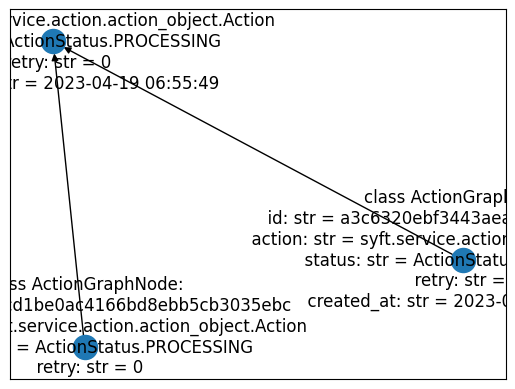

In [29]:
graph2.draw_graph()